### This is a demo for artpop for showing a color magnitude diagram of a composite stellar population with magnitude in I band versus V-I as axes.

In [2]:
# Third-party imports 
import numpy as np
import matplotlib.pyplot as plt 
from astropy import units as u   

# Project import
import artpop

# artpop's matplotlib style
plt.style.use(artpop.mpl_style)

# use this random state for reproducibility
rng = np.random.RandomState(112)



# setup for ages, photometric system, and etc.
imf = 'kroupa'  # initial mass function
phot_system = 'UBVRIplus'
log_ages = artpop.MISTIsochrone._log_age_grid[40:-3]

I made a composite stellar population consists of three types of stars: old, intermediate, and young, each with different age and population. Distance is only 10 pc, as default. Here the same setup from the tutorial is used for demo purpose.

In [4]:
ssp_old = artpop.MISTSSP(
    log_age = 10.1,       # log of age in years
    feh = -1.5,           # metallicity [Fe/H]
    phot_system = 'LSST', # photometric system(s)
    num_stars = 5e5,      # number of stars
    random_state = rng,   # random state for reproducibility
)

ssp_intermediate = artpop.MISTSSP(
    log_age = 9.5,        # log of age in years
    feh = -1,             # metallicity [Fe/H]
    phot_system = 'LSST', # photometric system(s)
    num_stars = 1e5,      # number of stars
    random_state = rng,   # random state for reproducibility
)

ssp_young = artpop.MISTSSP(
    log_age = 8.5,        # log of age in years
    feh = 0,              # metallicity [Fe/H]
    phot_system = 'LSST', # photometric system(s)
    num_stars = 1e4,      # number of stars
    random_state = rng,   # random state for reproducibility
)

csp = ssp_old + ssp_intermediate + ssp_young
print(type(csp))

<class 'artpop.stars.populations.CompositePopulation'>


Now, we plot the color magnitude diagram for this pop, second one with labels in ages.

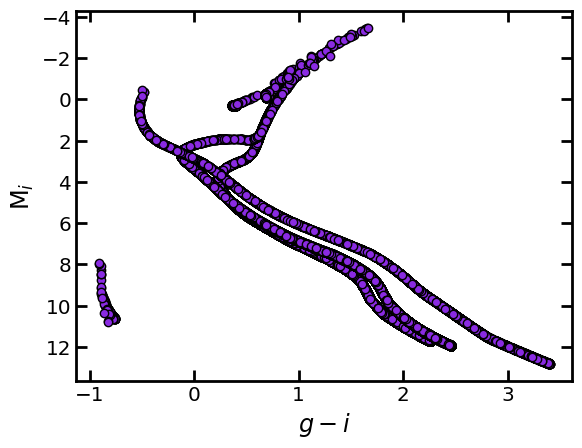

In [8]:
i = csp.star_mags('LSST_i')
g = csp.star_mags('LSST_g')
plt.plot(g-i, i, 'o', c='blueviolet', mec='k')
plt.gca().invert_yaxis()

plt.xlabel(r'$g-i$')
plt.ylabel(r'M$_i$');

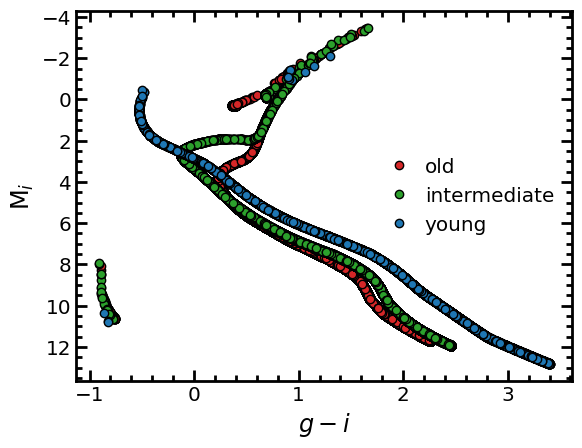

In [9]:
# generating age mask for pop
old = csp.ssp_labels == 1
med = csp.ssp_labels == 2
young = csp.ssp_labels == 3

plt.plot(g[old] - i[old], i[old], 'o', 
         c='tab:red', mec='k', label='old')
plt.plot(g[med] - i[med], i[med], 'o', 
         c='tab:green', mec='k', label='intermediate')
plt.plot(g[young] - i[young], i[young], 'o', 
         c='tab:blue', mec='k', label='young')

plt.legend(loc='center right')
plt.minorticks_on()
plt.gca().invert_yaxis()
plt.xlabel(r'$g-i$')
plt.ylabel(r'M$_i$');

We then try the other photometric system with v and i bands. Now, we use loops to sample pop ages and metallicity, using examples from python script of the paper.

In [10]:
###############################################################################
# Sun AB and Vega magnitudes for converting to Solar luminosities
###############################################################################
V_sun_ab = 4.81
V_sun_vega = 4.81

I_sun_ab = 4.52
I_sun_vega = 4.10

sun_mag = dict(
    V=dict(vega=V_sun_vega, ab=V_sun_ab),
    I=dict(vega=I_sun_vega, ab=I_sun_ab)
)

# Solar luminosity as function of filter, absolute mag, and magnitude system
L_sun = lambda m, band, system: 10**(0.4*(sun_mag[band][system] - m))
###############################################################################

In [11]:
###############################################################################
# Calculate SSP mass, mags, and SBF mags using ArtPop (takes ~6 minutes)
###############################################################################

# Setting up the environment for running artpop
imf = 'kroupa'
phot_system = 'UBVRIplus'
log_ages = artpop.MISTIsochrone._log_age_grid[40:-3] # _log_age_grid = np.arange(5.0, 10.3, 0.05), here we discarded marginal ages

# SSP mass
mass = {}

# SSP magnitudes
V = {}
I = {}

for feh in [-1.5, 0.0]:  # sampling with various metallicity
    print(f'[Fe/H] = {feh}')

    mass[feh] = []

    V[feh] = []
    I[feh] = []

    for log_age in log_ages:

        mist = artpop.MISTIsochrone(log_age, feh, phot_system)

        mass[feh].append(mist.ssp_surviving_mass('kroupa'))

        V[feh].append(mist.ssp_mag('Bessell_V', imf))
        I[feh].append(mist.ssp_mag('Bessell_I', imf))

    mass[feh] = np.array(mass[feh])

    V[feh] = np.array(V[feh])
    I[feh] = np.array(I[feh])
###############################################################################

[Fe/H] = -1.5
INFO: Fetching MIST synthetic photometry grid for UBVRIplus.
INFO: Extracting grid from MIST_v1.2_vvcrit0.4_UBVRIplus.txz.


[Fe/H] = 0.0


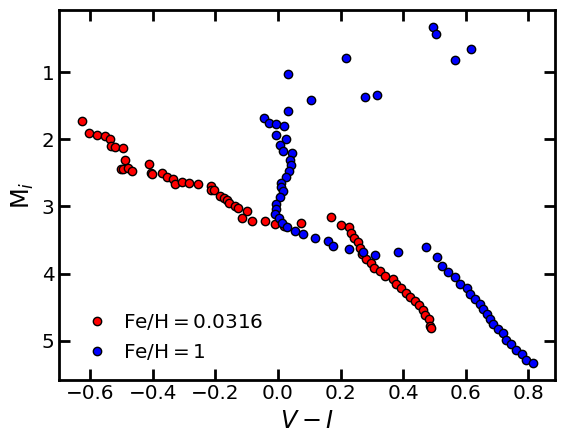

In [32]:
plt.plot(V[-1.5]-I[-1.5], I[-1.5], 'o', c='red', mec='k', label=r'Fe/H$=0.0316$')
plt.plot( V[0]-I[0], I[0], 'o', c='blue', mec='k', label=r'Fe/H$=1$')
plt.gca().invert_yaxis()

plt.legend(loc='lower left')
plt.xlabel(r'$V-I$')
plt.ylabel(r'M$_i$');

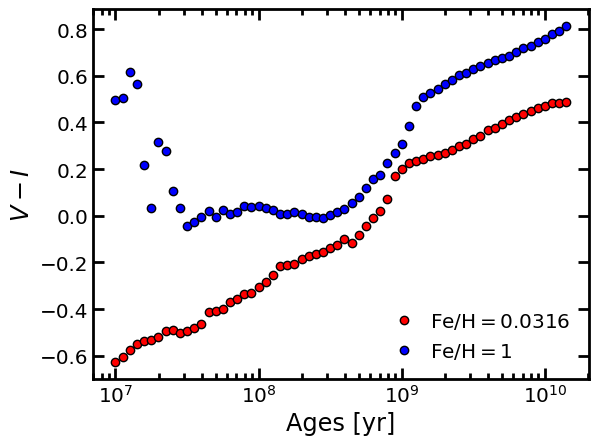

In [31]:
plt.plot(10**log_ages, V[-1.5]-I[-1.5], 'o', c='red', mec='k', label=r'Fe/H$=0.0316$')
plt.plot(10**log_ages, V[0]-I[0], 'o', c='blue', mec='k', label=r'Fe/H$=1$')
# plt.gca().invert_yaxis()
plt.xscale('log')

plt.legend(loc='lower right')
plt.xlabel(r'Ages [yr]')
plt.ylabel(r'$V-I$');